**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_ENCODE_FCC/references 



## Import data

In [2]:
txt_region = "fcc_astarr_macs_input_overlap"
txt_fdiry  = file.path(FD_RES, "region_integration", txt_region)
txt_fname  = "result.coverage.ranknorm.starrmpra.whg.tsv"
txt_fpath  = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_score_starrmpra_import = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 181854      8


Chrom,ChromStart,ChromEnd,Region,Assay,Score,RankNorm,Mean
chr1,138321,139517,chr1:138321-139517,ASTARR,0.0303204,0.4011845,0.5282837
chr1,267910,268557,chr1:267910-268557,ASTARR,-1.3684092,0.0358144,0.1025081
chr1,778233,779389,chr1:778233-779389,ASTARR,2.4204654,0.9607872,0.9754253


In [3]:
txt_region = "fcc_astarr_macs_input_overlap"
txt_fdiry  = file.path(
    FD_RES, 
    "region_coverage_fcc", 
    txt_region,
    "summary"
)
txt_fname  = "result.coverage.zscore.final.tsv"
txt_fpath  = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_score_fcc = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 432505      9


Chrom,ChromStart,ChromEnd,Region,Score,Assay_Name,Assay_Type,Assay_Group,Assay_Label
chr10,100729094,100729750,chr10:100729094-100729750,-0.3065107,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr10,100743501,100744571,chr10:100743501-100744571,-0.2702473,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr10,100745413,100745741,chr10:100745413-100745741,0.1130381,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH


In [4]:
dat = dat_region_score_starrmpra_import
dat = dat %>% 
    dplyr::select(Chrom:Region) %>% 
    dplyr::distinct()

dat_region = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 60618     4


Chrom,ChromStart,ChromEnd,Region
chr1,138321,139517,chr1:138321-139517
chr1,267910,268557,chr1:267910-268557
chr1,778233,779389,chr1:778233-779389


In [5]:
VEC_TXT_ASSAY = c("ASTARR", "WSTARR", "TMPRA", "LMPRA")

In [6]:
dat = dat_region_score_starrmpra_import
dat = dat %>% 
    dplyr::select(Region, Mean) %>% 
    dplyr::distinct() %>%
    dplyr::arrange(Mean)
vec = dat$Region

VEC_TXT_REGION = vec
print(length(vec))

[1] 60618


In [7]:
dat = dat_region_score_starrmpra_import
dat = dat %>%
    dplyr::mutate(
        Assay  = factor(Assay,  levels=VEC_TXT_ASSAY),
        Region = factor(Region, levels=VEC_TXT_REGION),
    )

dat_region_score_starrmpra_arrange = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 181854      8


Chrom,ChromStart,ChromEnd,Region,Assay,Score,RankNorm,Mean
chr1,138321,139517,chr1:138321-139517,ASTARR,0.0303204,0.4011845,0.5282837
chr1,267910,268557,chr1:267910-268557,ASTARR,-1.3684092,0.0358144,0.1025081
chr1,778233,779389,chr1:778233-779389,ASTARR,2.4204654,0.9607872,0.9754253


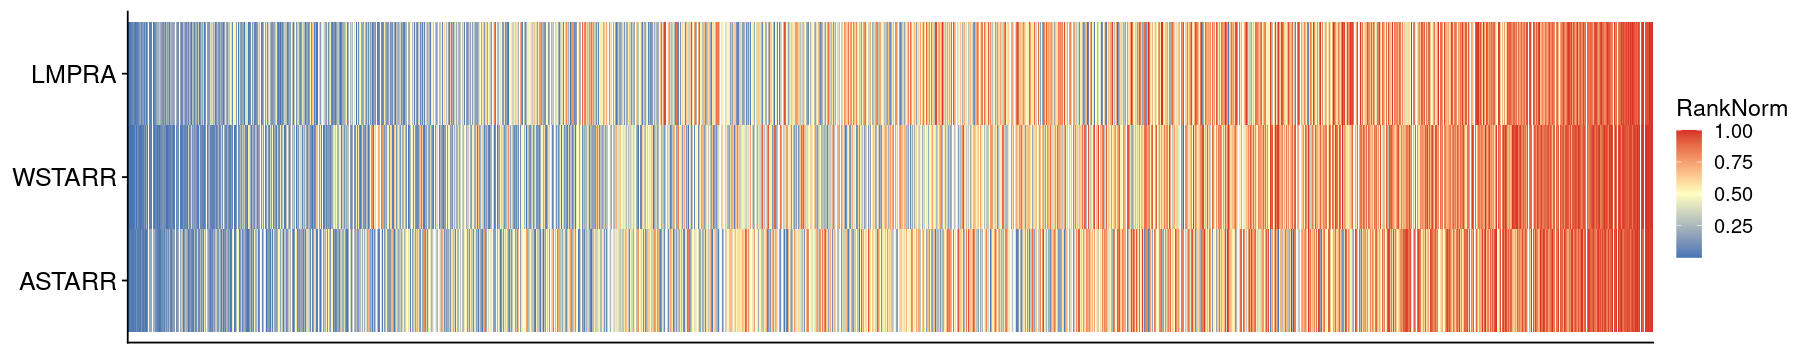

In [8]:
theme_fill = scale_fill_gradient2(
    low  = "#4575b4",
    mid  = "#ffffbf",
    high = "#d73027",
    midpoint = 0.5
)

theme_text = theme(
    axis.ticks.x = element_blank(),
    axis.text.x  = element_blank(),
    axis.text.y  = element_text(size = 15),
    #axis.title.x = element_text(size = 20),
    axis.title.x = element_blank(),
    axis.title.y = element_blank()
)

theme_legend = theme(legend.position = "none")

dat = dat_region_score_starrmpra_arrange

gpt = ggplot(dat, aes(x=Region, y=Assay, fill=RankNorm)) +
    geom_tile() +
    labs(x="Open Chromatin Regions") +
    theme_cowplot() + 
    theme_text +
    theme_fill

gpt_score_starrmpra = gpt + theme(legend.position = "none")

options(repr.plot.height=3, repr.plot.width=15)
print(gpt)

In [14]:
dat = dat_region_score_fcc
dat = dat %>% 
    dplyr::filter(Assay_Type == "CRISPRi-Growth") %>%
    dplyr::select(Region, Score)

dat_region_score_cgrowth = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 72743     2


Region,Score
chr1:605104-605675,0.3484333
chr1:778233-779389,0.4510784
chr1:817031-817525,-1.1072667


In [15]:
dat = dplyr::left_join(
    dat_region,
    dat_region_score_cgrowth,
    by = "Region"
)

dat = dat %>% 
    dplyr::mutate(Region = factor(Region, levels=VEC_TXT_REGION)) %>%
    replace(is.na(.), 0)

dat_region_score_cgrowth_arrange = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 60618     5


Chrom,ChromStart,ChromEnd,Region,Score
chr1,138321,139517,chr1:138321-139517,0.0000000
chr1,267910,268557,chr1:267910-268557,0.0000000
chr1,778233,779389,chr1:778233-779389,0.4510784


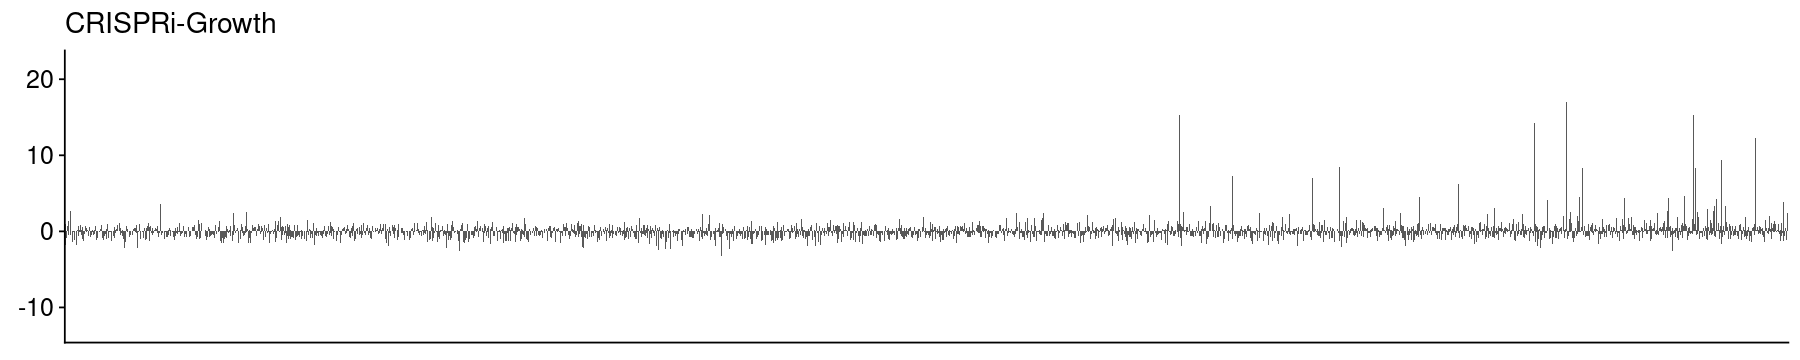

In [16]:
theme_text = theme(
    axis.ticks.x = element_blank(),
    axis.text.x  = element_blank(),
    axis.text.y  = element_text(size = 15),
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    plot.title = element_text(face = "plain", size = 17)
    #axis.title.y = element_text(size = 15)
)

theme_legend = theme(legend.position = "none")

dat = dat_region_score_cgrowth_arrange

gpt = ggplot(dat, aes(x=Region, y=Score)) + 
    geom_col(width=2, position="identity") +
    labs(title = "CRISPRi-Growth") +
    theme_cowplot() + 
    theme_text +
    theme_legend

gpt_score_cgrowth = gpt

options(repr.plot.height=3, repr.plot.width=15)
print(gpt)

In [ ]:
lst = listgpt_score_starrmpra